In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cm=1/2.54

plt.style.use("ggplot")

In [2]:
conf = pd.read_csv('data/Conformation_A001_V11nS77.txt', names=['time','x','y','z'], delim_whitespace=True) # MD 3000 ATP 2000 R 1.0
#conf = pd.read_csv('data/Conformation_A001_V11nS73.txt', names=['time','x','y','z'], delim_whitespace=True)
Head = conf.iloc[0::13,:]
Head = Head.reset_index(drop=True)

dt = 0.01 

In [17]:
Hd = []
# dt = 0.01 -- Jump 1
# dt*1 -- jump 1 = 0.01
# dt*2 -- jump 2 = 0.02
# dt*10 -- jump 10 = 0.1
# dt*20 -- jump 20 = 0.2
for jmp in range(1,42): # 21
    _ = Head[0::jmp]
    Hd.append(_.reset_index(drop=True))

In [18]:
Hd[40]

,time,x,y,z
0,0,3.000000,0.000000,1.250000e-02
1,4100000,5.663123,0.455629,9.116690e-10
2,8200000,7.284018,-1.642379,1.194903e-02
3,12300000,9.562611,-2.912188,4.533090e-03
4,16400000,12.253924,-3.264521,5.200172e-03
5,20500000,14.769208,-4.901262,3.397166e-03
6,24600000,15.708431,-7.269859,3.486298e-02
7,28700000,15.636879,-9.952841,2.752217e-02
8,32800000,14.251077,-12.331760,4.906847e-03
9,36900000,12.400345,-14.259662,1.412759e-06


In [19]:
dxHd = []; dyHd = []

for i in range(len(Hd)):
    dxHd_ = np.diff(Hd[i]['x'])
    dyHd_ = np.diff(Hd[i]['y'])
    dxHd.append(dxHd_)
    dyHd.append(dyHd_)

In [20]:
distHd = []; spdHd = []; mnSpdHd = []; stdSpdHd = []

for i in range(len(dxHd)):
    distHd_ = np.sqrt((dxHd[i]**2)+(dyHd[i]**2))
    spdHd_ = distHd_/(dt*(i+1))
    mnSpdHd_ = np.mean(spdHd_)
    stdSpdHd_ = np.std(spdHd_)
    distHd.append(distHd_)
    spdHd.append(spdHd_)
    mnSpdHd.append(mnSpdHd_)
    stdSpdHd.append(stdSpdHd_)

Dt = np.arange(dt,dt*len(mnSpdHd)+dt,dt)

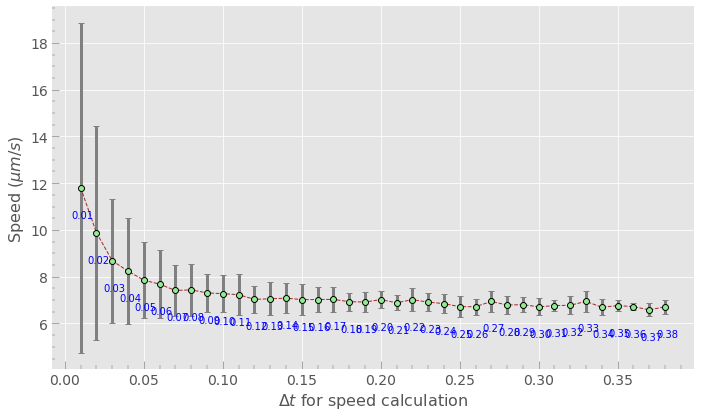

In [21]:
fig, ax = plt.subplots(figsize=(25*cm,15*cm))

rmv = -3

ax.errorbar(Dt[:rmv],mnSpdHd[:rmv],stdSpdHd[:rmv], marker='o', mec='black', linestyle='--', lw=1, color='brown',\
            ecolor='grey', elinewidth=3, capsize=3, markerfacecolor='lightgreen')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_yticks(np.arange(4,19,2))
#ax.set_xticks(np.arange(0.0,6.2,1.0))
ax.tick_params(labelsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_position(('axes',-0.01))
#ax.spines['left'].set_position(('axes',-0.01))

x_ = Dt[:rmv]; y_ = mnSpdHd[:rmv]
for x,y in zip(x_,y_):
    label = "{:.2f}".format(x)
    ax.annotate(label,(x,y),textcoords="offset points", xytext=(13,-30),ha='right',color='blue')

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('$\Delta t$ for speed calculation', fontsize=16)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=16)
#ax.set_title('R = 1.0', fontsize=18) # , $F_{M_2}$ = 9.2 pN

fig.tight_layout()


#plt.savefig('fig/v9DtvsSpd.svg', fmt='svg', dpi=1000, bbox_inches='tight')

#plt.savefig('fig/v11nDtvsSpd.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/v11nDtvsSpd.png', format='png', dpi=700, bbox_inches='tight')

In [22]:
mnSpdHd[9]

7.275002610627472

In [23]:
mnSpdHd[11]

7.031034060924515

In [24]:
mnSpdHd[12]

7.054493763669707

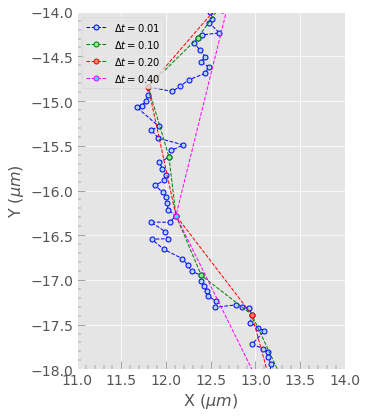

In [38]:
fig, ax = plt.subplots(figsize=(15*cm,15*cm))
#plt.style.use('ggplot') # like R figures *

ax.plot(Hd[0]['x'],Hd[0]['y'],marker='o', markersize=5, markerfacecolor="lightblue", ls='--', lw=1, color='blue', label='$\Delta t = %.2f$'%Dt[0])
#ax.plot(Hd[4]['x'],Hd[4]['y'],marker='.', markerfacecolor="None", ls='--', lw=1, color='orange', label='$\Delta t = %.2f$'%Dt[4])
ax.plot(Hd[9]['x'],Hd[9]['y'],marker='o', markersize=5, markerfacecolor="lightgreen", ls='--', lw=1, color='green', label='$\Delta t = %.2f$'%Dt[9])
ax.plot(Hd[19]['x'],Hd[19]['y'],marker='o', markersize=5, markerfacecolor="salmon", ls='--', lw=1, color='red', label='$\Delta t = %.2f$'%Dt[19]) # 11
ax.plot(Hd[39]['x'],Hd[39]['y'],marker='o', markersize=5, markerfacecolor="cyan", ls='--', lw=1, color='magenta', label='$\Delta t = %.2f$'%Dt[39]) # 12
#ax.plot(Head2['x'],Head2['y'])
#ax.plot(Head5['x'],Head5['y'])

ax.set_xlim([11,14])
ax.set_ylim([-18,-14])

#ax.set_ylim(top=6)
ax.legend(loc='upper left')

ax.set_aspect('equal')

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# #ax.spines['right'].set_color('none')
# #ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_position(('axes',-0.01))
# ax.spines['left'].set_position(('axes',-0.01))

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('X ($\mu m$)', fontsize=16)
ax.set_ylabel('Y ($\mu m$)', fontsize=16)
#ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5

fig.tight_layout()


#plt.savefig('fig/MeanSpeedCalculation.svg', fmt='svg', dpi=1000, bbox_inches='tight')

#plt.savefig('fig/MeanSpeedCalculation.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/MeanSpeedCalculation.png', format='png', dpi=700, bbox_inches='tight')